In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [2]:
df=pd.read_csv('bank.csv',sep=';')
df.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [3]:
df=df.dropna()
df=pd.get_dummies(df)
print(df.columns)

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'education_primary', 'education_secondary', 'education_tertiary',
       'education_unknown', 'default_no', 'default_yes', 'housing_no',
       'housing_yes', 'loan_no', 'loan_yes', 'contact_cellular',
       'contact_telephone', 'contact_unknown', 'month_apr', 'month_aug',
       'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'poutcome_failure', 'poutcome_other', 'poutcome_success',
       'poutcome_unknown', 'y_no', 'y_yes'],
      dtype='object')


In [4]:
df

,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,...,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,y_no,y_yes
0,30,1787,19,79,1,-1,0,False,False,False,...,False,False,True,False,False,False,False,True,True,False
1,33,4789,11,220,1,339,4,False,False,False,...,True,False,False,False,True,False,False,False,True,False
2,35,1350,16,185,1,330,1,False,False,False,...,False,False,False,False,True,False,False,False,True,False
3,30,1476,3,199,4,-1,0,False,False,False,...,False,False,False,False,False,False,False,True,True,False
4,59,0,5,226,1,-1,0,False,True,False,...,True,False,False,False,False,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,-333,30,329,5,-1,0,False,False,False,...,False,False,False,False,False,False,False,True,True,False
4517,57,-3313,9,153,1,-1,0,False,False,False,...,True,False,False,False,False,False,False,True,True,False
4518,57,295,19,151,11,-1,0,False,False,False,...,False,False,False,False,False,False,False,True,True,False
4519,28,1137,6,129,4,211,3,False,True,False,...,False,False,False,False,False,True,False,False,True,False


In [5]:
x=df[['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']]
y=df['poutcome_success']

In [6]:
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2,random_state=46)

In [7]:
clf=DecisionTreeClassifier()
clf.fit(x_train, y_train)

DecisionTreeClassifier()

In [8]:
y_pre=clf.predict(x_test)
clf.score(x_test,y_test)

0.9569060773480663

In [9]:
print(classification_report(y_test,y_pre))

              precision    recall  f1-score   support

       False       0.99      0.97      0.98       882
        True       0.28      0.43      0.34        23

    accuracy                           0.96       905
   macro avg       0.63      0.70      0.66       905
weighted avg       0.97      0.96      0.96       905



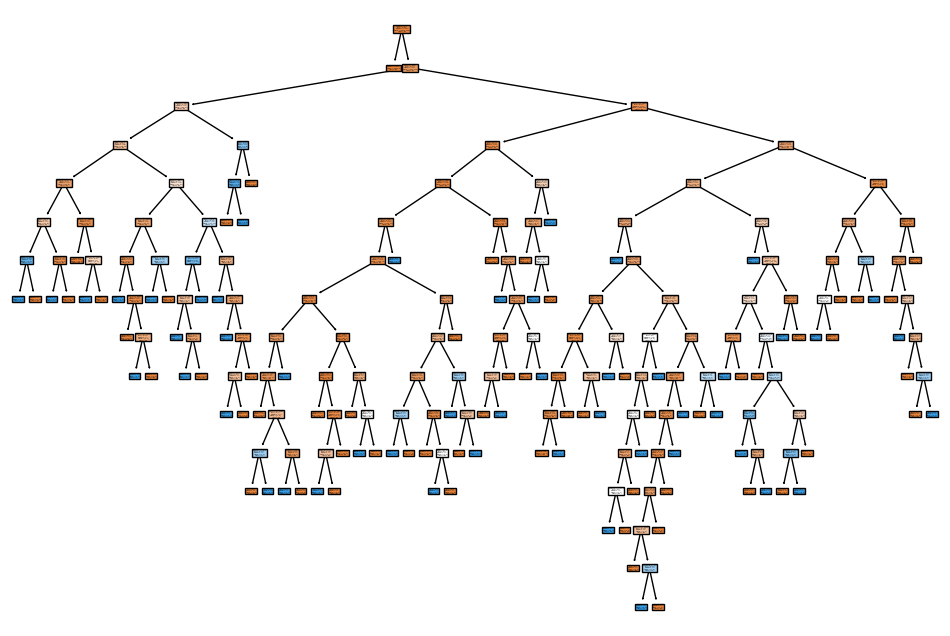

In [10]:
plt.figure(figsize=(12,8))
tree.plot_tree(clf,feature_names=list(x.columns), class_names=['No','Yes'],filled=True)
plt.show()

In [11]:
importances=clf.feature_importances_
feature_names=x.columns
feature_importance=pd.DataFrame({'Feature':feature_names,'Importance':importances})
feature_importance=feature_importance.sort_values(by='Importance',ascending=False)
print(feature_importance)

    Feature  Importance
5     pdays    0.406520
3  duration    0.196083
0       age    0.123572
2       day    0.123053
1   balance    0.088872
6  previous    0.048942
4  campaign    0.012958


In [12]:
param_grid={'max_depth':[None,5,10,15],
            'min_samples_split':[2,5,10],
            'min_samples_leaf':[1,2,4]}
grid_search=GridSearchCV(estimator=clf, param_grid=param_grid, cv=5)
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [None, 5, 10, 15],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]})

In [13]:
best_params=grid_search.best_params_
clf=DecisionTreeClassifier(**best_params)
clf.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5, min_samples_split=10)

In [14]:
y_pred=clf.predict(x_test)
clf.score(x_test,y_test)

0.9756906077348066

In [15]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

       False       0.98      0.99      0.99       882
        True       0.53      0.35      0.42        23

    accuracy                           0.98       905
   macro avg       0.76      0.67      0.70       905
weighted avg       0.97      0.98      0.97       905



In [16]:
clf_tuned=DecisionTreeClassifier(**best_params)
clf_tuned.fit(x_train,y_train)
y_pred_tuned=clf_tuned.predict(x_test)
print("Classification Report (Tuned Model):")
print(classification_report(y_test,y_pred_tuned))

Classification Report (Tuned Model):
              precision    recall  f1-score   support

       False       0.98      0.99      0.99       882
        True       0.53      0.35      0.42        23

    accuracy                           0.98       905
   macro avg       0.76      0.67      0.70       905
weighted avg       0.97      0.98      0.97       905



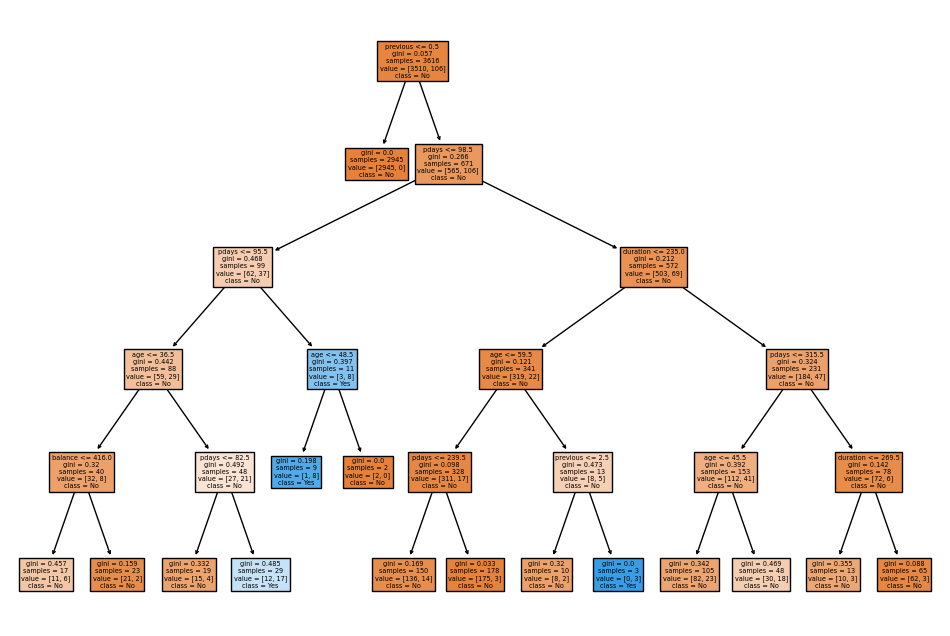

In [17]:
plt.figure(figsize=(12,8))
plt.title("Decision Tree")
tree.plot_tree(clf, feature_names=list(x.columns), class_names=['No','Yes'], filled=True)
plt.show()